In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from random import random
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import mean_squared_error, categorical_crossentropy, mse

from sklearn.metrics import confusion_matrix
import itertools

- Make the data
- Preprocess the data
- Make the neural network
- Compile the network
- Train the network
- Predict the values

In [4]:
# Make the data
N = 10000
train_sample = np.zeros((N,2))
train_sample[:, 0] = np.random.uniform(0.01,1,(N))
train_sample[:, 1] = np.random.random((N)) 

def f(a):
    x = a[0]
    y = a[1]
    r2 = (x-0.5)**2 + (y-0.3)**2
    return np.exp(-r2)

train_label = np.array([f(i) for i in train_sample])

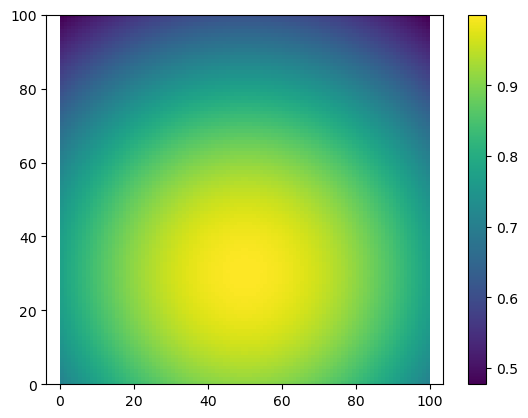

In [5]:
reals = np.zeros_like(train_sample)
x_r = np.linspace(0,1,100)
y_r = np.linspace(0,1,100)
x,y = np.meshgrid(x_r, y_r)
reals[:,0] = x.flatten()
reals[:,1] = y.flatten()
z = np.array([f(real) for real in reals])
plt.pcolormesh(z.reshape(100,100));
plt.axis("equal")
plt.colorbar();

In [10]:
#make a neural network

net = Sequential()
net.add(Dense(100, input_shape=(2,), activation='selu'))
net.add(Dense(100,activation='selu'))
net.add(Dense(100,activation='selu'))
net.add(Dense(1,activation='selu'))

In [11]:
net.compile(optimizer=SGD(learning_rate=1e-4), loss='mse')

In [12]:
net.fit(x=train_sample, y=train_label, batch_size=10,epochs=30,verbose=1)

Epoch 1/30
1000/1000 [==============================] - 1s 646us/step - loss: 0.1106
Epoch 2/30
1000/1000 [==============================] - 1s 647us/step - loss: 0.0129
Epoch 3/30
1000/1000 [==============================] - 1s 642us/step - loss: 0.0082
Epoch 4/30
1000/1000 [==============================] - 1s 644us/step - loss: 0.0065
Epoch 5/30
1000/1000 [==============================] - 1s 645us/step - loss: 0.0057
Epoch 6/30
1000/1000 [==============================] - 1s 639us/step - loss: 0.0053
Epoch 7/30
1000/1000 [==============================] - 1s 657us/step - loss: 0.0050
Epoch 8/30
1000/1000 [==============================] - 1s 665us/step - loss: 0.0048
Epoch 9/30
1000/1000 [==============================] - 1s 749us/step - loss: 0.0046
Epoch 10/30
1000/1000 [==============================] - 1s 635us/step - loss: 0.0045
Epoch 11/30
1000/1000 [==============================] - 1s 692us/step - loss: 0.0043
Epoch 12/30
1000/1000 [==============================] - 1s 698

In [15]:
net.fit(x=train_sample, y=train_label,shuffle=True,validation_split=0.2, batch_size=10,epochs=30,verbose=1)

Epoch 1/30
800/800 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 2/30
800/800 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3/30
800/800 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4/30
800/800 [==============================] - 1s 791us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 5/30
800/800 [==============================] - 1s 794us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 6/30
800/800 [==============================] - 1s 788us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 7/30
800/800 [==============================] - 1s 795us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 8/30
800/800 [==============================] - 1s 777us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/30
800/800 [==============================] - 1s 780us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 10/30
800/800 [==============================] - 1s 773us/step - loss: 0.0015 - va

In [16]:
net.fit(x=train_sample, y=train_label,shuffle=True,batch_size=10,epochs=100,verbose=0)

1000/1000 [==============================] - 1s 747us/step


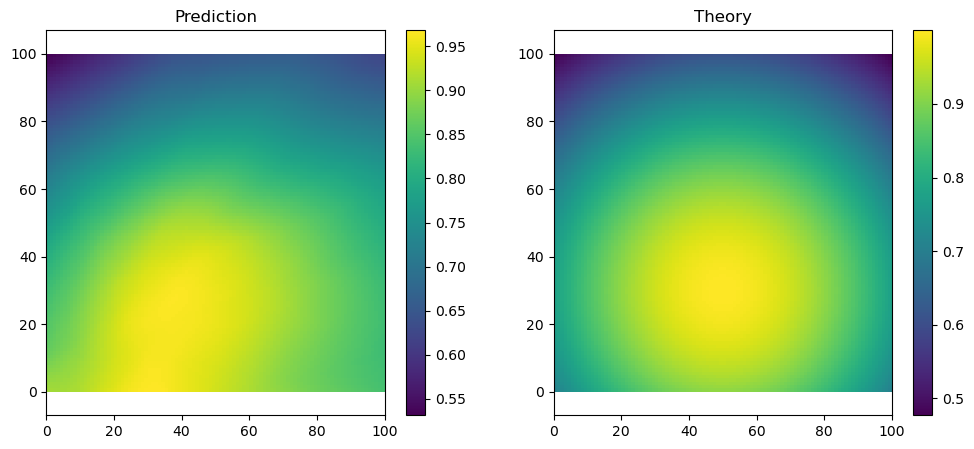

In [14]:
test_data = np.zeros_like(train_sample)

x_r = np.linspace(0,1,100)
y_r = np.linspace(0,1,100)
x,y = np.meshgrid(x_r, y_r)
test_data[:,0] = x.flatten()
test_data[:,1] = y.flatten()

fig = plt.figure(figsize=(12,5))

test_output = net.predict(test_data, batch_size=10)
plt.subplot(1,2,1)
plt.pcolormesh(test_output.reshape(100,100));
plt.title("Prediction")
plt.axis("equal")
plt.colorbar();
plt.subplot(1,2,2)
plt.pcolormesh(z.reshape(100,100));
plt.title("Theory")
plt.axis("equal")
plt.colorbar();